In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import scipy.stats as stats
import seaborn as sns

%pwd
#os.chdir('C:\\Users\\Prudhvi\\Desktop\\Prudhvi\\Data Science\\Data')
os.chdir('C:\\Users\\KASTU1\\Desktop\\Analytics Path\\R\\Data')
%pwd

C:\Users\KASTU1\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


'C:\\Users\\KASTU1\\Desktop\\Analytics Path\\R\\Data'

In [23]:
churn=pd.read_csv("Teleco_Cust_Attr (1).csv",sep=',')

In [24]:
churn.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [25]:
## Data Type Conversion
churn["SeniorCitizen"]=churn["SeniorCitizen"].astype(object)

## Replacing few values 
churn.loc[churn.OnlineSecurity=="No internet service","OnlineSecurity"]="No"
churn.loc[churn.OnlineBackup=="No internet service","OnlineBackup"]="No"
churn.loc[churn.DeviceProtection=="No internet service","DeviceProtection"]="No"
churn.loc[churn.TechSupport=="No internet service","TechSupport"]="No"
churn.loc[churn.StreamingTV=="No internet service","StreamingTV"]="No"
churn.loc[churn.StreamingMovies=="No internet service","StreamingMovies"]="No"
churn.loc[churn.MultipleLines=="No phone service","MultipleLines"]="No"

In [ ]:
for i in churn.columns:
    print(i)
    if(churn[i].dtype.name=="object"):
        %matplotlib inline
        print(i)
        pd.crosstab(churn.Churn,churn[i]).plot(kind='bar')
        plt.title('Churn Frequency for gender Title')
        plt.xlabel('Churn')
        plt.ylabel('Frequemcy of {}'.format(i))
        plt.show()
        #plt.savefig('gender_Freq_Graph')
        #my_tab = pd.crosstab(index=churn["Churn"],columns="count")      # Name the count column
        #print(my_tab)
        # Table of survival vs. sex Table o 
        survived_sex = pd.crosstab(index=churn["Churn"], columns=churn[i],margins=True)
        #survived_class.columns = ["class1","class2","class3","rowtotal"]
        #survived_sex.index= ["Yes","No"]
        print(survived_sex)

#survived_sex

customerID
customerID


KeyboardInterrupt: 

In [26]:
## Dropping few columns
churn.drop("customerID", axis = 1, inplace=True)
churn.drop("gender",axis=1,inplace=True)
#churn.drop("PhoneService",axis=1,inplace=True)

In [27]:
## We can remove the "Gender Column" as it is not explaining the output variables
## 
churn.head(2)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [29]:
#churn.describe(include = 'all')

In [86]:
## Check for the kmissing values
NAs=pd.concat([churn.isnull().sum()],axis=1,keys=col)
NAs[NAs.sum(axis=1)>0]

# Filling missing Age values with mean
churn[‘TotalCharges’] = train[‘TotalCharges’].fillna(churn[‘TotalCharges’].mean())

## Filling missing values with the most repeated values 
churn[‘gender’] = churn[‘gender’].fillna(churn[‘gender’].mode()[0])

SyntaxError: invalid character in identifier (<ipython-input-86-095c731ee1c2>, line 6)

In [3]:
churn['gender'].mode()[0]

'Male'

In [28]:
## Feature Engineering
churn.insert(0, "Charges", 0)
total_rows = churn['Churn'].count()
for i in range(0,total_rows):
    churn.loc[i,"Charges"]=churn.loc[i,"tenure"]/churn.loc[i,"MonthlyCharges"]

In [29]:
#churn.drop("customerID", axis = 1, inplace=True)
churn.drop("TotalCharges", axis = 1,  inplace=True)
churn.drop("tenure",axis=1,inplace=True)
churn.drop("MonthlyCharges",axis=1,inplace=True)

In [8]:
my_tab = pd.crosstab(index=churn["gender"],  # Make a crosstab
            columns="count")   # Name the count column
print(my_tab)
# Table of survival vs. sex Table o 
survived_sex = pd.crosstab(index=churn["Churn"], columns=churn["Partner"])
#survived_sex.index= ["Yes","No"]
print(survived_sex)

col_0   count
gender       
Female   3488
Male     3555
Partner    No   Yes
Churn              
No       2441  2733
Yes      1200   669


In [30]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
for i in churn.columns:
    if(churn[i].dtype.name=="object"):
        churn[i] = churn[i].astype("category")
        churn[i] = lc.fit_transform(churn[i])
        churn[i] = churn[i].astype("category")
        
# master_dataset.head(7)
#churn.dtypes
churn['SeniorCitizen']=churn['SeniorCitizen'].astype('uint8')
churn['Partner']=churn['Partner'].astype('uint8')
churn['Dependents']=churn['Dependents'].astype('uint8')
churn['PaperlessBilling']=churn['PaperlessBilling'].astype('uint8')

In [31]:
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder()
churn_cat=[]
churn_ncat=[]
for i in churn.columns:
    if(churn[i].dtype.name=="category"):
        if(len(churn[i].unique()) > 1):
            churn_cat.append(i) 
        else:
            churn_ncat.append(i)
    else:
        churn_ncat.append(i)
                 
churn_cat = churn[churn_cat]
churn_ncat = churn[churn_ncat]

churn_cat = pd.get_dummies(churn_cat,drop_first=True)
fn_dataset = pd.merge(churn_cat,churn_ncat,left_index=True, right_index=True)
X = fn_dataset.iloc[:,:-1]
Y = fn_dataset.iloc[:,-1:]
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0)

In [32]:
X_train.dtypes

PhoneService_1          uint8
MultipleLines_1         uint8
InternetService_1       uint8
InternetService_2       uint8
OnlineSecurity_1        uint8
OnlineBackup_1          uint8
DeviceProtection_1      uint8
TechSupport_1           uint8
StreamingTV_1           uint8
StreamingMovies_1       uint8
Contract_1              uint8
Contract_2              uint8
PaymentMethod_1         uint8
PaymentMethod_2         uint8
PaymentMethod_3         uint8
Churn_1                 uint8
Charges               float64
SeniorCitizen           uint8
Partner                 uint8
Dependents              uint8
dtype: object

###### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2',C=5)
print(classifier)
result=classifier.fit(X_train, y_train)
print(classifier.score(X_train, y_train))
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(result.coef_))], axis = 1)
print(coefficients)

print(result)
y_pred_train = result.predict(X_train)
y_pred_test = result.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm_train=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix of Train Dataset")
print(cm_train)
TP=cm_train[1][1]
FP=cm_train[0][1]
FN=cm_train[1][0]
TN=cm_train[0][0]
precision_train=TP/(TP+FP)
Recall_train=TP/(TP+FN)
Accuracy_train=(TP+TN)/(TP+FP+TN+FN)
F1_Score_train=(2*precision_train*Recall_train)/(precision_train+Recall_train)
print("Precision of Train Data",+precision_train)
print("Rrecall of Train Data",+Recall_train)
print("Accuracy of Train Data",+Accuracy_train)
print("F1 Score of Train Data",+F1_Score_train)

print("classification report of Train Dataset")
classificaiton_report_train=classification_report(y_train,y_pred_train)
print(classificaiton_report_train)

cm_test=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix of test Dataset")
print(cm_test)
TP=cm_test[1][1]
FP=cm_test[0][1]
FN=cm_test[1][0]
TN=cm_test[0][0]
precision_test=TP/(TP+FP)
Recall_test=TP/(TP+FN)
Accuracy_test=(TP+TN)/(TP+FP+TN+FN)
F1_Score_test=(2*precision_test*Recall_test)/(precision_test+Recall_test)
print("Precision of Test Data",+precision_test)
print("Rrecall of Test Data",+Recall_test)
print("Accuracy of Test Data",+Accuracy_test)
print("F1 Score of Test Data",+F1_Score_test)
#print("classification report of Train Dataset")
#classificaiton_report_test=classification_report(y_test,y_pred_test)
#print(classificaiton_report_test)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.7004922377887164
                     0         0
0       PhoneService_1  0.078853
1      MultipleLines_1  0.234799
2    InternetService_1  0.527657
3    InternetService_2 -0.896113
4     OnlineSecurity_1 -0.319908
5       OnlineBackup_1  0.199651
6   DeviceProtection_1 -0.152702
7        TechSupport_1 -0.042744
8        StreamingTV_1  0.358158
9    StreamingMovies_1  0.338688
10          Contract_1 -0.324678
11          Contract_2 -0.544746
12     PaymentMethod_1  0.134911
13     PaymentMethod_2  0.223597
14     PaymentMethod_3 -0.180514
15             Churn_1  0.297084
16             Charges  0.160347
17       SeniorCitizen  0.299338
18             Partner  0.018514
19          Dependents -0.095382
LogisticRegression(C=5, c

C:\Users\KASTU1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###### Decision Tree

In [36]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5,min_samples_split=190, min_samples_leaf=43)
clf=clf.fit(X_train,y_train)
print(clf)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm_train=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix of Train Dataset")
print(cm_train)
TP=cm_train[1][1]
FP=cm_train[0][1]
FN=cm_train[1][0]
TN=cm_train[0][0]
precision_train=TP/(TP+FP)
Recall_train=TP/(TP+FN)
Accuracy_train=(TP+TN)/(TP+FP+TN+FN)
F1_Score_train=(2*precision_train*Recall_train)/(precision_train+Recall_train)
print("Precision of Train Data",+precision_train)
print("Rrecall of Train Data",+Recall_train)
print("Accuracy of Train Data",+Accuracy_train)
print("F1 Score of Train Data",+F1_Score_train)

print("classification report of Train Dataset")
classificaiton_report_train=classification_report(y_train,y_pred_train)
print(classificaiton_report_train)

cm_test=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix of test Dataset")
print(cm_test)
TP=cm_test[1][1]
FP=cm_test[0][1]
FN=cm_test[1][0]
TN=cm_test[0][0]
precision_test=TP/(TP+FP)
Recall_test=TP/(TP+FN)
Accuracy_test=(TP+TN)/(TP+FP+TN+FN)
F1_Score_test=(2*precision_test*Recall_test)/(precision_test+Recall_test)
print("Precision of Test Data",+precision_test)
print("Rrecall of Test Data",+Recall_test)
print("Accuracy of Test Data",+Accuracy_test)
print("F1 Score of Test Data",+F1_Score_test)
#print("classification report of Train Dataset")
#classificaiton_report_test=classification_report(y_test,y_pred_test)
#print(classificaiton_report_test)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=43, min_samples_split=190,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Confusion Matrix of Train Dataset
[[1110 1016]
 [ 578 2578]]
Precision of Train Data 0.7173066221480244
Rrecall of Train Data 0.8168567807351077
Accuracy of Train Data 0.6982203710715638
F1 Score of Train Data 0.7638518518518518
classification report of Train Dataset
             precision    recall  f1-score   support

          0       0.66      0.52      0.58      2126
          1       0.72      0.82      0.76      3156

avg / total       0.69      0.70      0.69      5282

Confusion Matrix of test Dataset
[[359 387]
 [190 825]]
Precision of Test Data 0.6806930693069307
Rrecall of Test Data 0.812807881773399
Accuracy of Test Data 0.672345

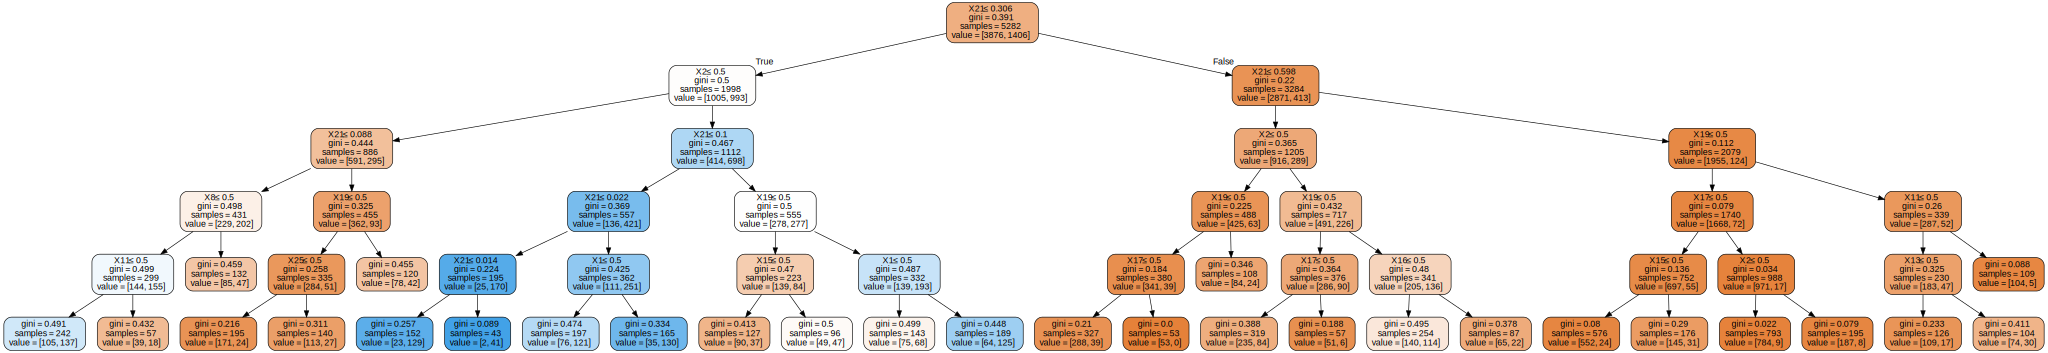

In [18]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [ ]:
from sklearn import tree
#from sklearn import grid_search
import numpy as np
from sklearn.model_selection import GridSearchCV
sample_split_range = tuple(range(2,50,2))
param_grid = dict(min_samples_split=sample_split_range)
parameters={'min_samples_split':range(10,500,20),'max_depth': range(1,20,2),'min_samples_leaf':range(3,350,10),'max_leaf_nodes':range(2,40,2),'max_features':range(2,10,2)}
#parameters={'min_samples_split':np.arange(10,500,20)}
#clf_tree=tree.DecisionTreeClassifier() 
grid = GridSearchCV(tree.DecisionTreeClassifier(), parameters, scoring='recall')
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.scorer_)

In [ ]:
#https://statinfer.com/204-3-10-pruning-a-decision-tree-in-python/

In [381]:
#from sklearn.metrics import roc_curve, auc
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_test)
#roc_auc = auc(false_positive_rate, true_positive_rate)
#print(roc_auc)
#print(false_positive_rate)
#print(true_positive_rate)

0.6506063490267466
[0. 1.]
[0.        0.4838013 1.       ]


###### max_depth
###### The first parameter to tune is max_depth. This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. We fit a decision tree with depths ranging from 1 to 32 and plot the training and test auc scores.

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.]


C:\Users\Prudhvi\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\Prudhvi\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in longlong_scalars


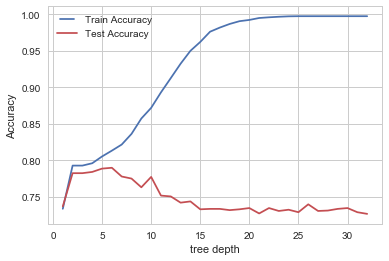

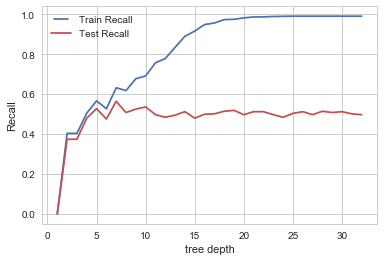

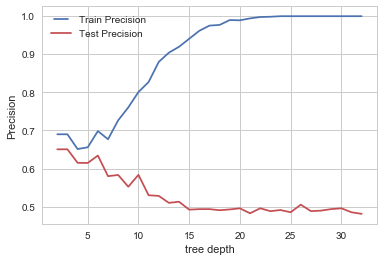

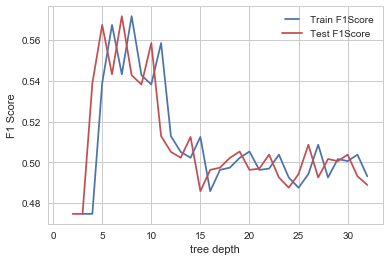

[0.7370812038614424, 0.7825099375354913, 0.7825099375354913, 0.7842135150482681, 0.7887563884156729, 0.7887563884156729, 0.778534923339012, 0.7745599091425327, 0.7649063032367973, 0.7751277683134583, 0.7518455423055083, 0.7518455423055083, 0.7365133446905168, 0.7473026689381034, 0.7319704713231119, 0.7296990346394094, 0.7336740488358887, 0.7359454855195912, 0.730266893810335, 0.7387847813742192, 0.7268597387847814, 0.7342419080068143, 0.7336740488358887, 0.7325383304940375, 0.7325383304940375, 0.7331061896649631, 0.7331061896649631, 0.7291311754684838, 0.7342419080068143, 0.730266893810335, 0.7348097671777399, 0.7342419080068143]


In [392]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
max_depths = np.linspace(1, 32, 32, endpoint=True)
print(max_depths)
train_results_accuracy = []
test_results_accuracy = []
train_results_recall = []
test_results_recall = []
train_results_precision = []
test_results_precision = []
train_results_f1score = []
test_results_f1score = []
for max_depth in max_depths:
   #clf = tree.DecisionTreeClassifier()
   dt = tree.DecisionTreeClassifier(max_depth=max_depth)
   dt=dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   #roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   #train_results.append(roc_auc)
   cm_train=confusion_matrix(y_train,train_pred)
   TP=cm_train[1][1]
   FP=cm_train[0][1]
   FN=cm_train[1][0]
   TN=cm_train[0][0]
   precision_train=TP/(TP+FP)
   Recall_train=TP/(TP+FN)
   Accuracy_train=(TP+TN)/(TP+FP+TN+FN)
   F1_Score_train=(2*precision_test*Recall_test)/(precision_test+Recall_test)
   train_results_accuracy.append(Accuracy_train)
   train_results_recall.append(Recall_train)
   train_results_precision.append(precision_train)
   train_results_f1score.append(F1_Score_train)
   y_pred = dt.predict(X_test)
   cm_test=confusion_matrix(y_test,y_pred)
   #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   #roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   #test_results.append(roc_auc)

   TP=cm_test[1][1]
   FP=cm_test[0][1]
   FN=cm_test[1][0]
   TN=cm_test[0][0]
   precision_test=TP/(TP+FP)
   Recall_test=TP/(TP+FN)
   Accuracy_test=(TP+TN)/(TP+FP+TN+FN)
   F1_Score_test=(2*precision_test*Recall_test)/(precision_test+Recall_test)
   test_results_accuracy.append(Accuracy_test)
   test_results_recall.append(Recall_test)
   test_results_precision.append(precision_test)
   test_results_f1score.append(F1_Score_test)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results_accuracy, 'b' ,label='Train Accuracy')
line2, = plt.plot(max_depths, test_results_accuracy, 'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('tree depth')
plt.show()

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results_recall, 'b' ,label='Train Recall')
line2, = plt.plot(max_depths, test_results_recall, 'r', label='Test Recall')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Recall')
plt.xlabel('tree depth')
plt.show()

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results_precision, 'b' ,label='Train Precision')
line2, = plt.plot(max_depths, test_results_precision, 'r', label='Test Precision')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Precision')
plt.xlabel('tree depth')
plt.show()

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results_f1score, 'b' ,label='Train F1Score')
line2, = plt.plot(max_depths, test_results_f1score, 'r', label='Test F1Score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 Score')
plt.xlabel('tree depth')
plt.show()
print(test_results)

###### We see that our model overfits for large depth values. The tree perfectly predicts all of the train data, however, it fails to generalize the findings for new data

###### min_samples_split
###### min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


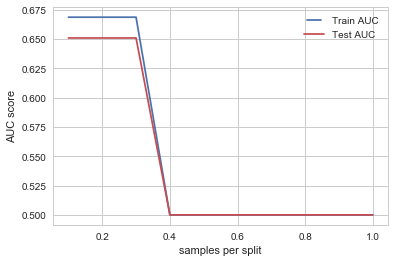

In [26]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
print(min_samples_splits)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   #clf = tree.DecisionTreeClassifier()
   dt = tree.DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt=dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b' ,label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('samples per split')
plt.show()


###### At 0.4 as the max_split_sample.... both test anda train are give almost same accuracy. Greater than 0.4 model is not learning any more

###### min_samples_leaf
###### min_samples_leaf is The minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree.

[0.1 0.2 0.3 0.4 0.5]


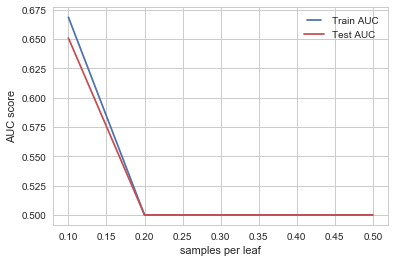

In [27]:
min_samples_leafs  = np.linspace(0.1, 0.5, 5, endpoint=True)
print(min_samples_leafs)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   #clf = tree.DecisionTreeClassifier()
   dt = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt=dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b' ,label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('samples per leaf')
plt.show()


###### When min samples per leaf is 10 both and train are performing well. As the sampels per leaf increases model is underfitting

### Building a model with the above assumptions:
###### min_samples_leaf=0.10
###### min_samples_split=0.3
###### max_depth=5

from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_leaf=0.10,min_samples_split=0.3,max_depth=10)
clf=clf.fit(X_train,y_train)
print(clf)
y_pred_train = clf.predict_proba(X_train)
y_pred_test = clf.predict_proba(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm_train=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix of Train Dataset")
print(cm_train)
print("classification report of Train Dataset")
classificaiton_report_train=classification_report(y_train,y_pred_train)
print(classificaiton_report_train)

cm_test=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix of test Dataset")
print(cm_test)
print("classification report of Train Dataset")
classificaiton_report_test=classification_report(y_test,y_pred_test)
print(classificaiton_report_test)

In [27]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_leaf=50,min_samples_split=50,max_depth=10)
clf = tree.DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
print(clf)
y_pred_train_p = clf.predict_proba(X_train)
y_pred_test_p = clf.predict_proba(X_test)
print(y_pred_test_p)

X_train['prediction_train']=0

for i in range(len(y_pred_train_p)):
    if(y_pred_train_p[i][0]>0.5):
        X_train.iloc[i,-1]=0
    else:
        X_train.iloc[i,-1]=1

X_test['prediction_test']=0

for i in range(len(y_pred_test_p)):
    if(y_pred_test_p[i][0]>0.5):
        X_test.iloc[i,-1]=0
    else:
        X_test.iloc[i,-1]=1

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm_train=confusion_matrix(y_train,X_train['prediction_train'])
print("Confusion Matrix of Train Dataset")
print(cm_train)
print("classification report of Train Dataset")
classificaiton_report_train=classification_report(y_train,X_train['prediction_train'])
print(classificaiton_report_train)

cm_test=confusion_matrix(y_test,X_test['prediction_test'])
print("Confusion Matrix of test Dataset")
print(cm_test)
print("classification report of Train Dataset")
classificaiton_report_test=classification_report(y_test,X_test['prediction_test'])
print(classificaiton_report_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


C:\Users\KASTU1\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\KASTU1\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\KASTU1\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

Confusion Matrix of Train Dataset
[[3865   11]
 [   8 1398]]
classification report of Train Dataset
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3876
          1       0.99      0.99      0.99      1406

avg / total       1.00      1.00      1.00      5282

Confusion Matrix of test Dataset
[[1022  276]
 [ 226  237]]
classification report of Train Dataset
             precision    recall  f1-score   support

          0       0.82      0.79      0.80      1298
          1       0.46      0.51      0.49       463

avg / total       0.73      0.71      0.72      1761



In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm_train=confusion_matrix(y_train,X_train['prediction_train'])
print("Confusion Matrix of Train Dataset")
print(cm_train)
print("classification report of Train Dataset")
classificaiton_report_train=classification_report(y_train,X_train['prediction_train'])
print(classificaiton_report_train)

cm_test=confusion_matrix(y_test,X_test['prediction_test'])
print("Confusion Matrix of test Dataset")
print(cm_test)
print("classification report of Train Dataset")
classificaiton_report_test=classification_report(y_test,X_test['prediction_test'])
print(classificaiton_report_test)

Confusion Matrix of Train Dataset
[[3621  255]
 [ 839  567]]
classification report of Train Dataset
             precision    recall  f1-score   support

          0       0.81      0.93      0.87      3876
          1       0.69      0.40      0.51      1406

avg / total       0.78      0.79      0.77      5282

Confusion Matrix of test Dataset
[[1205   93]
 [ 290  173]]
classification report of Train Dataset
             precision    recall  f1-score   support

          0       0.81      0.93      0.86      1298
          1       0.65      0.37      0.47       463

avg / total       0.77      0.78      0.76      1761



In [356]:
X_train.drop("prediction_train", axis = 1,  inplace=True)

In [358]:
X_train['prediction_train']=0


In [45]:
 print(X_train.iloc[:1,-1:])
X_train['prediction_train']=0
 print(X_train.iloc[0,-1])

      MonthlyCharges
3296            49.3
0


C:\Users\KASTU1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
X_train.shape

(5282, 27)

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
%timeit
rf = RandomForestClassifier(min_samples_split=10,n_estimators=80, oob_score=True,max_features=6 ,min_samples_leaf=50, max_depth=7,random_state = 123)
print(rf)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm_train=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix of Train Dataset")
print(cm_train)
TP=cm_train[1][1]
FP=cm_train[0][1]
FN=cm_train[1][0]
TN=cm_train[0][0]
precision_train=TP/(TP+FP)
Recall_train=TP/(TP+FN)
Accuracy_train=(TP+TN)/(TP+FP+TN+FN)
F1_Score_train=(2*precision_train*Recall_train)/(precision_train+Recall_train)
print("Precision of Train Data",+precision_train)
print("Rrecall of Train Data",+Recall_train)
print("Accuracy of Train Data",+Accuracy_train)
print("F1 Score of Train Data",+F1_Score_train)
print("classification report of Train Dataset")
classificaiton_report_train=classification_report(y_train,y_pred_train)
print(classificaiton_report_train)

cm_test=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix of test Dataset")
print(cm_test)
TP=cm_test[1][1]
FP=cm_test[0][1]
FN=cm_test[1][0]
TN=cm_test[0][0]
precision_test=TP/(TP+FP)
Recall_test=TP/(TP+FN)
Accuracy_test=(TP+TN)/(TP+FP+TN+FN)
F1_Score_test=(2*precision_test*Recall_test)/(precision_test+Recall_test)
print("Precision of Test Data",+precision_test)
print("Rrecall of Test Data",+Recall_test)
print("Accuracy of Test Data",+Accuracy_test)
print("F1 Score of Test Data",+F1_Score_test)
#print("classification report of Train Dataset")
#classificaiton_report_test=classification_report(y_test,y_pred_test)
#print(classificaiton_report_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
            oob_score=True, random_state=123, verbose=0, warm_start=False)


C:\Users\KASTU1\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Confusion Matrix of Train Dataset
[[3589  287]
 [ 695  711]]
Precision of Train Data 0.7124248496993988
Rrecall of Train Data 0.5056899004267426
Accuracy of Train Data 0.814085573646346
F1 Score of Train Data 0.591514143094842
classification report of Train Dataset
             precision    recall  f1-score   support

          0       0.84      0.93      0.88      3876
          1       0.71      0.51      0.59      1406

avg / total       0.80      0.81      0.80      5282

Confusion Matrix of test Dataset
[[1193  105]
 [ 256  207]]
Precision of Test Data 0.6634615384615384
Rrecall of Test Data 0.4470842332613391
Accuracy of Test Data 0.7950028392958546
F1 Score of Test Data 0.5341935483870968


In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(verbose=1, random_state=123, n_estimators=600, learning_rate=0.05,  max_features=6, max_depth = 5, min_samples_leaf=4)
print(gb)
gb.fit(X_train, y_train)
y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm_train=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix of Train Dataset")
print(cm_train)
TP=cm_train[1][1]
FP=cm_train[0][1]
FN=cm_train[1][0]
TN=cm_train[0][0]
precision_train=TP/(TP+FP)
Recall_train=TP/(TP+FN)
Accuracy_train=(TP+TN)/(TP+FP+TN+FN)
F1_Score_train=(2*precision_train*Recall_train)/(precision_train+Recall_train)
print("Precision of Train Data",+precision_train)
print("Rrecall of Train Data",+Recall_train)
print("Accuracy of Train Data",+Accuracy_train)
print("F1 Score of Train Data",+F1_Score_train)
print("classification report of Train Dataset")
classificaiton_report_train=classification_report(y_train,y_pred_train)
print(classificaiton_report_train)

cm_test=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix of test Dataset")
print(cm_test)
TP=cm_test[1][1]
FP=cm_test[0][1]
FN=cm_test[1][0]
TN=cm_test[0][0]
precision_test=TP/(TP+FP)
Recall_test=TP/(TP+FN)
Accuracy_test=(TP+TN)/(TP+FP+TN+FN)
F1_Score_test=(2*precision_test*Recall_test)/(precision_test+Recall_test)
print("Precision of Test Data",+precision_test)
print("Rrecall of Test Data",+Recall_test)
print("Accuracy of Test Data",+Accuracy_test)
print("F1 Score of Test Data",+F1_Score_test)
#print("classification report of Train Dataset")
#classificaiton_report_test=classification_report(y_test,y_pred_test)
#print(classificaiton_report_test)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=5,
              max_features=6, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=4, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=600,
              presort='auto', random_state=123, subsample=1.0, verbose=1,
              warm_start=False)
      Iter       Train Loss   Remaining Time 
         1           1.1311            4.20s
         2           1.1053            4.19s
         3           1.0814            4.18s
         4           1.0611            4.32s
         5           1.0428            4.35s
         6           1.0250            4.21s
         7           1.0081            4.37s
         8           0.9935            4.48s
         9           0.9795            4.57s
        10           0.9672            4.52s
        20           0.8761         

C:\Users\KASTU1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        30           0.8242            4.19s
        40           0.7930            4.41s
        50           0.7731            4.23s
        60           0.7580            4.24s
        70           0.7469            4.16s
        80           0.7361            4.06s
        90           0.7265            4.00s
       100           0.7183            3.88s
       200           0.6550            2.98s
       300           0.6063            2.32s
       400           0.5644            1.51s
       500           0.5261            0.79s
       600           0.4902            0.00s
Confusion Matrix of Train Dataset
[[3714  162]
 [ 334 1072]]
Precision of Train Data 0.8687196110210696
Rrecall of Train Data 0.7624466571834992
Accuracy of Train Data 0.9060961756910261
F1 Score of Train Data 0.812121212121212
classification report of Train Dataset
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      3876
          1       0.87      0.76      0.8

In [64]:
from numpy import loadtxt
from xgboost import XGBClassifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=10, min_child_weight=30, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=1, reg_lambda=0, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.7,eval_metric='error')
print(XGB)
XGB.fit(X_train, y_train)
y_pred_train = XGB.predict(X_train)
y_pred_test = XGB.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm_train=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix of Train Dataset")
print(cm_train)
TP=cm_train[1][1]
FP=cm_train[0][1]
FN=cm_train[1][0]
TN=cm_train[0][0]
precision_train=TP/(TP+FP)
Recall_train=TP/(TP+FN)
Accuracy_train=(TP+TN)/(TP+FP+TN+FN)
F1_Score_train=(2*precision_train*Recall_train)/(precision_train+Recall_train)
print("Precision of Train Data",+precision_train)
print("Rrecall of Train Data",+Recall_train)
print("Accuracy of Train Data",+Accuracy_train)
print("F1 Score of Train Data",+F1_Score_train)
print("classification report of Train Dataset")
classificaiton_report_train=classification_report(y_train,y_pred_train)
print(classificaiton_report_train)

cm_test=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix of test Dataset")
print(cm_test)
TP=cm_test[1][1]
FP=cm_test[0][1]
FN=cm_test[1][0]
TN=cm_test[0][0]
precision_test=TP/(TP+FP)
Recall_test=TP/(TP+FN)
Accuracy_test=(TP+TN)/(TP+FP+TN+FN)
F1_Score_test=(2*precision_test*Recall_test)/(precision_test+Recall_test)
print("Precision of Test Data",+precision_test)
print("Rrecall of Test Data",+Recall_test)
print("Accuracy of Test Data",+Accuracy_test)
print("F1 Score of Test Data",+F1_Score_test)
#print("classification report of Train Dataset")
#classificaiton_report_test=classification_report(y_test,y_pred_test)
#print(classificaiton_report_test)

X_test['pred']=y_pred_test

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, eval_metric='error', gamma=0,
       learning_rate=0.2, max_delta_step=0, max_depth=10,
       min_child_weight=30, missing=None, n_estimators=300, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=1, reg_lambda=0, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.7)


C:\Users\KASTU1\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KASTU1\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in fields PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

In [ ]:
for i in X_test.columns:
    print(i)
    if(churn[i].dtype.name=="object"):
        %matplotlib inline
        print(i)
        pd.crosstab(churn.Churn,churn[i]).plot(kind='bar')
        plt.title('Churn Frequency for gender Title')
        plt.xlabel('Churn')
        plt.ylabel('Frequemcy of {}'.format(i))
        plt.show()
        #plt.savefig('gender_Freq_Graph')
        #my_tab = pd.crosstab(index=churn["Churn"],columns="count")      # Name the count column
        #print(my_tab)
        # Table of survival vs. sex Table o 
        survived_sex = pd.crosstab(index=churn["Churn"], columns=churn[i],margins=True)
        #survived_class.columns = ["class1","class2","class3","rowtotal"]
        #survived_sex.index= ["Yes","No"]
        print(survived_sex)

#survived_sex

In [106]:
X_test.columns

Index(['MultipleLines_1', 'MultipleLines_2', 'InternetService_1',
       'InternetService_2', 'OnlineSecurity_1', 'OnlineSecurity_2',
       'OnlineBackup_1', 'OnlineBackup_2', 'DeviceProtection_1',
       'DeviceProtection_2', 'TechSupport_1', 'TechSupport_2', 'StreamingTV_1',
       'StreamingTV_2', 'StreamingMovies_1', 'StreamingMovies_2', 'Contract_1',
       'Contract_2', 'PaymentMethod_1', 'PaymentMethod_2', 'PaymentMethod_3',
       'Charges', 'SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling',
       'pred', 'actual'],
      dtype='object')

In [113]:
X_test_no=X_test[(X_test['pred'] == 0) & (X_test['actual'] == 1)]

In [118]:
X_test_no.head(300)

,MultipleLines_1,MultipleLines_2,InternetService_1,InternetService_2,OnlineSecurity_1,OnlineSecurity_2,OnlineBackup_1,OnlineBackup_2,DeviceProtection_1,DeviceProtection_2,...,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,Charges,SeniorCitizen,Partner,Dependents,PaperlessBilling,pred,actual
134,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0.045096,0,0,0,0,0,1
4296,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0.484429,0,1,1,0,0,1
5458,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0.137255,0,0,0,1,0,1
5549,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0.030644,0,0,0,1,0,1
779,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0.044101,0,0,0,0,0,1
3028,1,0,0,0,0,1,0,1,0,1,...,0,0,1,0.115607,0,0,0,1,0,1
6760,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0.080972,0,0,1,1,0,1
6174,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0.134907,0,0,0,1,0,1
641,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0.765806,0,1,1,0,0,1
6038,0,1,1,0,0,1,0,1,0,1,...,0,0,0,0.612960,0,1,1,1,0,1
